# Analiza i projektiranje računalom #

### 4. Domaća zadaća -  _Genetski algoritam_ ###

Učitavanje potrebnih biblioteka.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 3. Zadatak ###

Učitavanje podatka iz datoteka.

In [2]:
f6d3d = np.loadtxt('data/f6d3d.txt')
f6d6d = np.loadtxt('data/f6d6d.txt')
f7d3d = np.loadtxt('data/f7d3d.txt')
f7d6d = np.loadtxt('data/f7d6d.txt')
f6d3b = np.loadtxt('data/f6d3b.txt')
f6d6b = np.loadtxt('data/f6d6b.txt')
f7d3b = np.loadtxt('data/f7d3b.txt')
f7d6b = np.loadtxt('data/f7d6b.txt')

Funkcija koja ispisuje statistiku za zadani vektor.

In [3]:
def statistics(fitness_vector, tol=-1e-6):
    print('Broj pogodataka:', np.count_nonzero(fitness_vector > tol), '/', len(fitness_vector))
    print('Srednja vrijednost:', np.mean(fitness_vector))
    print('Medijan:           ', np.median(fitness_vector))
    print('Najbolja dobrota:  ', np.max(fitness_vector))

Statistika za funkciju **f6** dimenzije **3** i **decimalnog** prikaza.

In [4]:
statistics(f6d3d)

Broj pogodataka: 7 / 30
Srednja vrijednost: -0.006582108964155378
Medijan:            -0.009715909877514362
Najbolja dobrota:   -4.549754650806648e-08


Statistika za funkciju **f6** dimenzije **3** i **binarnog** prikaza.

In [5]:
statistics(f6d3b)

Broj pogodataka: 7 / 30
Srednja vrijednost: -0.007449009088655882
Medijan:            -0.009715909877520829
Najbolja dobrota:   -2.1565218411012665e-07


Statistika za funkciju **f6** dimenzije **6** i **decimalnog** prikaza.

In [6]:
statistics(f6d6d)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.009715910003155743
Medijan:            -0.0097159098775145
Najbolja dobrota:   -0.009715909877514362


Statistika za funkciju **f6** dimenzije **6** i **binarnog** prikaza.

In [7]:
statistics(f6d6b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.009715915388328679
Medijan:            -0.009715910237574094
Najbolja dobrota:   -0.009715909885101737


Statistika za funkciju **f7** dimenzije **3** i **decimalnog** prikaza.

In [8]:
statistics(f7d3d)

Broj pogodataka: 30 / 30
Srednja vrijednost: -8.767170989498859e-07
Medijan:            -9.188991292132038e-07
Najbolja dobrota:   -5.893636592211277e-07


Statistika za funkciju **f7** dimenzije **3** i **binarnog** prikaza.

In [9]:
statistics(f7d3b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.010398223660750402
Medijan:            -0.007209012150852522
Najbolja dobrota:   -0.007209012150852522


Statistika za funkciju **f7** dimenzije **6** i **decimalnog** prikaza.

In [10]:
statistics(f7d6d)

Broj pogodataka: 13 / 30
Srednja vrijednost: -0.005211007859569802
Medijan:            -0.005364481906723688
Najbolja dobrota:   -7.515566893408809e-07


Statistika za funkciju **f7** dimenzije **6** i **binarnog** prikaza.

In [11]:
statistics(f7d6b)

Broj pogodataka: 0 / 30
Srednja vrijednost: -0.17046535110528593
Medijan:            -0.1786967432550447
Najbolja dobrota:   -0.128094577487384


### 4. Zadatak ###

Učitavanje `population_sizes.csv` datoteke.

In [12]:
population_sizes_df = pd.read_csv('data/population_sizes.csv')

Srednje vrijednosti po populacijama:

In [13]:
population_sizes_df.mean()

30    -0.005361
50    -0.003680
100   -0.006231
200   -0.006292
dtype: float64

Medijani po populacijama:

In [14]:
population_sizes_df.median()

30    -0.006669
50    -0.001276
100   -0.008200
200   -0.007160
dtype: float64

Najbolje dobrote po populacijama:

In [15]:
population_sizes_df.max()

30    -1.402687e-05
50    -2.847278e-06
100   -5.399893e-07
200   -7.766895e-04
dtype: float64

**Boxplot** za `population_sizes_df`:

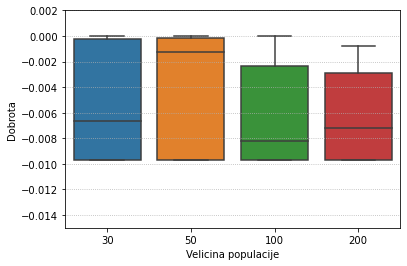

In [16]:
sns.boxplot(data=population_sizes_df)
plt.ylim(-0.015, 0.002)
plt.ylabel('Dobrota')
plt.xlabel('Velicina populacije')
plt.grid(True, linestyle='dotted', axis='y')
plt.show()

Učitavanje `mutations.csv` datoteke.

In [17]:
mutations_df = pd.read_csv('data/mutations.csv')

Srednje vrijednosti za mutacije:

In [18]:
mutations_df.mean()

0.1   -0.009300
0.3   -0.007215
0.6   -0.005500
0.9   -0.004323
dtype: float64

Medijani za mutacije:

In [19]:
mutations_df.median()

0.1   -0.009716
0.3   -0.009716
0.6   -0.009716
0.9   -0.002511
dtype: float64

Najbolje dobrote za mutacije:

In [20]:
mutations_df.max()

0.1   -5.996737e-07
0.3   -9.179413e-07
0.6   -9.909348e-08
0.9   -9.560495e-07
dtype: float64

**Boxplot** za `mutations_df`:

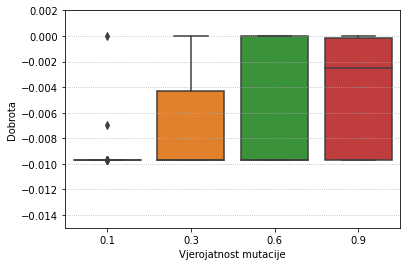

In [21]:
sns.boxplot(data=mutations_df)
plt.ylim(-0.015, 0.002)
plt.ylabel('Dobrota')
plt.xlabel('Vjerojatnost mutacije')
plt.grid(True, linestyle='dotted', axis='y')
plt.show()

### 5. Zadatak ###

Učitavanje `tournaments.csv` datoteke.

In [22]:
tournaments_df = pd.read_csv('data/tournaments.csv')

Srednje vrijednosti za turnire:

In [23]:
tournaments_df.mean()

3    -0.005938
5    -0.005338
10   -0.006794
15   -0.004962
20   -0.006818
25   -0.006277
30   -0.007481
40   -0.006851
50   -0.006230
dtype: float64

Medijani za turnire:

In [24]:
tournaments_df.median()

3    -0.009440
5    -0.007882
10   -0.009716
15   -0.003794
20   -0.009716
25   -0.009716
30   -0.009716
40   -0.009716
50   -0.008143
dtype: float64

Najbolje dobrote za turnire:

In [25]:
tournaments_df.max()

3    -8.558908e-07
5    -3.762400e-07
10   -4.309597e-07
15   -2.047977e-05
20   -2.195579e-04
25   -2.748156e-05
30   -6.147389e-05
40   -3.418033e-04
50   -1.088364e-04
dtype: float64

**Boxplot** za `tournaments_df`:

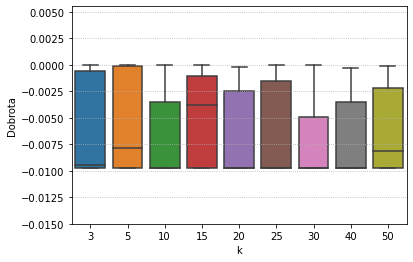

In [26]:
sns.boxplot(data=tournaments_df)
plt.ylim(-0.015, 0.0055)
plt.ylabel('Dobrota')
plt.xlabel('k')
plt.grid(True, linestyle='dotted', axis='y')
plt.show()